In [1]:
import pandas as pd
final_df = pd.read_csv('../data/dataset/combined_valeurs.csv')
final_df.head()                                                                                                                                                                                             

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003492,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003562,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003582,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003602,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right


In [2]:
final_df_160_2_r = final_df[(final_df['velocity'] == 210) & (final_df['experiment_number'] == 2) & (final_df['position'] == 'Right')]

final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
322,27/01/2005 11:47:17,300.343,0,1932,1,15,1,1,210.0,5.403011,...,0.003741,0.003761,0.003771,0.003791,0.003801,0.003811,0.003781,NaN,2,Right
323,27/01/2005 11:52:17,600.562,0,3554,1,15,1,1,210.0,5.403011,...,0.003801,0.003801,0.003771,0.003731,0.003731,0.003751,0.003761,NaN,2,Right
324,27/01/2005 11:57:18,901.359,0,5178,1,15,1,1,210.0,5.403011,...,0.003801,0.003781,0.003751,0.003731,0.003751,0.003761,0.003771,NaN,2,Right
325,27/01/2005 12:02:19,1202.328,0,6805,1,15,1,1,210.0,5.403011,...,0.003781,0.003791,0.003801,0.003811,0.003811,0.003801,0.003811,NaN,2,Right
326,27/01/2005 12:07:20,1502.828,0,8429,1,15,1,1,210.0,5.403011,...,0.003801,0.003821,0.003811,0.003801,0.003791,0.003801,0.003781,NaN,2,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,27/01/2005 21:38:15,35758.562,0,193513,1,15,1,1,210.0,5.403011,...,0.003911,0.003921,0.003901,0.003881,0.003851,0.003861,0.003871,NaN,2,Right
441,27/01/2005 21:43:16,36059.484,0,195141,1,15,1,1,210.0,5.403011,...,0.003921,0.003921,0.003931,0.003911,0.003911,0.003911,0.003891,NaN,2,Right
442,27/01/2005 21:48:17,36359.750,0,196765,1,15,1,1,210.0,5.403011,...,0.003901,0.003891,0.003871,0.003871,0.003881,0.003871,0.003901,NaN,2,Right
443,27/01/2005 21:53:17,36660.062,0,198386,1,15,1,1,210.0,5.403011,...,0.003901,0.003911,0.003921,0.003901,0.003881,0.003861,0.003881,NaN,2,Right


Displacement (Original): 0.00027935999999999976
Displacement (Smoothed): 0.00021151799999999995


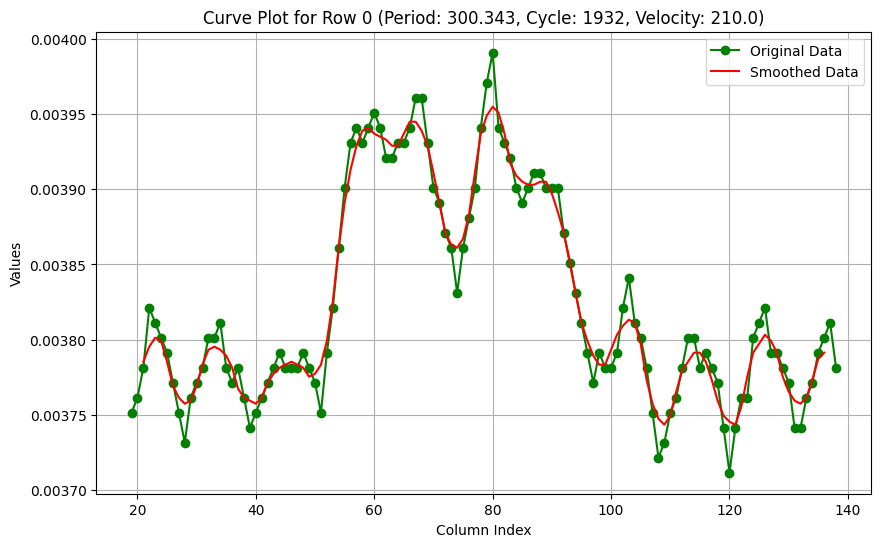

(0.00021151799999999995,
 19          NaN
 20          NaN
 21     0.003785
 22     0.003795
 23     0.003801
          ...   
 134    0.003773
 135    0.003787
 136    0.003791
 137         NaN
 138         NaN
 Name: 322, Length: 120, dtype: float64)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_row_curve_with_smoothing(df, row_index, window_size=5):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Select the values from column 19 to column 138 (inclusive) in the specified row
    data_to_plot = pd.to_numeric(df.iloc[row_index, 19:139], errors='coerce')

    # Apply rolling mean for smoothing
    smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()

    # Plot original and smoothed data
    plt.figure(figsize=(10, 6))
    plt.plot(range(19, 139), data_to_plot, label='Original Data', color='green', marker='o')
    plt.plot(range(19, 139), smoothed_data, label='Smoothed Data', color='red')

    # Get period, cycle number, and velocity for the specific row
    period = df.iloc[row_index, 1]
    cycle_number = df.iloc[row_index, 3]
    velocity = df.iloc[row_index, 8]

    # Calculate displacement for both original and smoothed data
    max_value = data_to_plot.max() if np.isfinite(data_to_plot.max()) else 0
    min_value = data_to_plot.min() if np.isfinite(data_to_plot.min()) else 0
    displacement_original = max_value - min_value

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0
    displacement_smoothed = max_value_smoothed - min_value_smoothed
    

    # Display calculated values on the plot
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Curve Plot for Row {row_index} (Period: {period}, Cycle: {cycle_number}, Velocity: {velocity})")
    plt.legend()
    plt.grid()

    # Print displacement information
    print(f"Displacement (Original): {displacement_original}")
    print(f"Displacement (Smoothed): {displacement_smoothed}")

    plt.show()
    return displacement_smoothed, smoothed_data
plot_row_curve_with_smoothing(final_df_160_2_r, 0, window_size=5)

In [4]:
import numpy as np
import pandas as pd

def calculate_first_smoothed_displacement(df, window_size=5):
    # Initialize a new column for smoothed displacement
    df['smoothed_displacement'] = np.nan
    
    for index in df.index:
        # Select the values from column 19 to column 138 (inclusive) in the current row
        data_to_smooth = pd.to_numeric(df.iloc[index, 19:139], errors='coerce')
        
        # Apply rolling mean for smoothing
        smoothed_data = data_to_smooth.rolling(window=window_size, center=True).mean()
        
        # Find the first non-NaN value in the smoothed data
        first_non_nan_value = smoothed_data[smoothed_data.notna()].iloc[0] if smoothed_data.notna().any() else np.nan
        
        # Store this value in the new column
        df.at[index, 'smoothed_displacement'] = first_non_nan_value
    
    return df

# Example usage:
# Calculate and add the smoothed displacement to the DataFrame
final_df = calculate_first_smoothed_displacement(final_df)

# Display the DataFrame to check the new column
print(final_df[['smoothed_displacement']])


      smoothed_displacement
0                  0.003552
1                  0.003558
2                  0.003564
3                  0.003566
4                  0.003580
...                     ...
5021               0.001536
5022               0.001557
5023               0.001538
5024               0.001555
5025               0.001540

[5026 rows x 1 columns]


In [53]:
final_df

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,133,134,135,136,137,138,139,experiment_number,position,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.003552
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.003558
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.003564
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.003566
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.003580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,29/06/2005 16:52:00,13521.859,0,140079,1,14,1,1,400.0,10.291450,...,0.001581,0.001561,0.001522,0.001522,0.001542,0.001571,NaN,7,Left,0.001536
5022,29/06/2005 16:57:00,13822.250,0,143168,1,14,1,1,400.0,10.291450,...,0.001522,0.001532,0.001601,0.001591,0.001542,0.001552,NaN,7,Left,0.001557
5023,29/06/2005 17:02:01,14123.312,0,146269,1,14,1,1,400.0,10.291450,...,0.001581,0.001561,0.001532,0.001522,0.001552,0.001542,NaN,7,Left,0.001538
5024,29/06/2005 17:07:02,14424.187,0,149363,1,14,1,1,400.0,10.291450,...,0.001571,0.001581,0.001561,0.001552,0.001522,0.001532,NaN,7,Left,0.001555


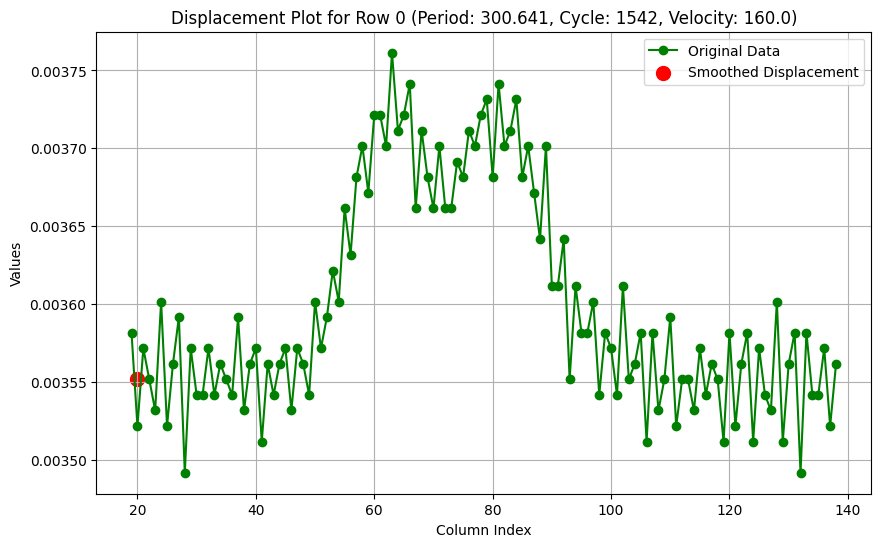

In [54]:
def plot_row_displacement_with_smoothed_point(df, row_index):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Extract original data for plotting
    original_data = pd.to_numeric(df.iloc[row_index, 19:139], errors='coerce')
    
    # Plot original data
    plt.figure(figsize=(10, 6))
    plt.plot(range(19, 139), original_data, label='Original Data', color='green', marker='o')

    # Get the single smoothed displacement value for this row
    smoothed_displacement = df.at[row_index, 'smoothed_displacement']
    
    # Plot the smoothed displacement as a single red point
    plt.scatter([20], [smoothed_displacement], color='red', label='Smoothed Displacement', s=100, marker='o')  # x=79 is roughly the midpoint
    
    # Get period, cycle number, and velocity for the specific row
    period = df.iloc[row_index, 1]
    cycle_number = df.iloc[row_index, 3]
    velocity = df.iloc[row_index, 8]

    # Display plot information
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Displacement Plot for Row {row_index} (Period: {period}, Cycle: {cycle_number}, Velocity: {velocity})")
    plt.legend()
    plt.grid()

    plt.show()

plot_row_displacement_with_smoothed_point(final_df, row_index=0)


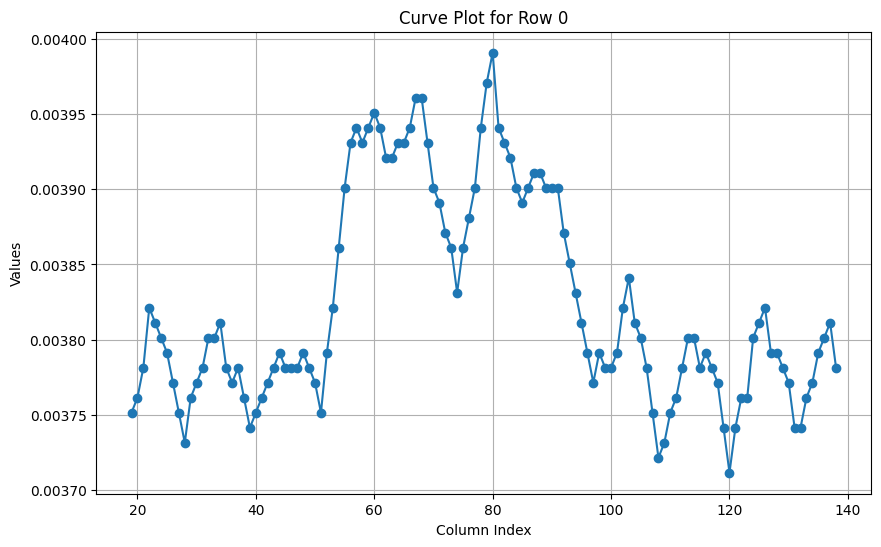

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_row_curve(df, row_index):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Select the values from column 19 to column 138 (inclusive) in the specified row
    y_values = df.iloc[row_index, 19:139].values
    
    # Generate x values as a range for plotting
    x_values = range(19, 139)
    
    # Plot the curve
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Curve Plot for Row {row_index}")
    plt.grid()
    plt.show()

# Example usage
plot_row_curve(final_df_160_2_r, 0)



In [56]:
final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
322,27/01/2005 11:47:17,300.343,0,1932,1,15,1,1,210.0,5.403011,...,0.003741,0.003761,0.003771,0.003791,0.003801,0.003811,0.003781,NaN,2,Right
323,27/01/2005 11:52:17,600.562,0,3554,1,15,1,1,210.0,5.403011,...,0.003801,0.003801,0.003771,0.003731,0.003731,0.003751,0.003761,NaN,2,Right
324,27/01/2005 11:57:18,901.359,0,5178,1,15,1,1,210.0,5.403011,...,0.003801,0.003781,0.003751,0.003731,0.003751,0.003761,0.003771,NaN,2,Right
325,27/01/2005 12:02:19,1202.328,0,6805,1,15,1,1,210.0,5.403011,...,0.003781,0.003791,0.003801,0.003811,0.003811,0.003801,0.003811,NaN,2,Right
326,27/01/2005 12:07:20,1502.828,0,8429,1,15,1,1,210.0,5.403011,...,0.003801,0.003821,0.003811,0.003801,0.003791,0.003801,0.003781,NaN,2,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,27/01/2005 21:38:15,35758.562,0,193513,1,15,1,1,210.0,5.403011,...,0.003911,0.003921,0.003901,0.003881,0.003851,0.003861,0.003871,NaN,2,Right
441,27/01/2005 21:43:16,36059.484,0,195141,1,15,1,1,210.0,5.403011,...,0.003921,0.003921,0.003931,0.003911,0.003911,0.003911,0.003891,NaN,2,Right
442,27/01/2005 21:48:17,36359.750,0,196765,1,15,1,1,210.0,5.403011,...,0.003901,0.003891,0.003871,0.003871,0.003881,0.003871,0.003901,NaN,2,Right
443,27/01/2005 21:53:17,36660.062,0,198386,1,15,1,1,210.0,5.403011,...,0.003901,0.003911,0.003921,0.003901,0.003881,0.003861,0.003881,NaN,2,Right


In [57]:
final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
322,27/01/2005 11:47:17,300.343,0,1932,1,15,1,1,210.0,5.403011,...,0.003741,0.003761,0.003771,0.003791,0.003801,0.003811,0.003781,NaN,2,Right
323,27/01/2005 11:52:17,600.562,0,3554,1,15,1,1,210.0,5.403011,...,0.003801,0.003801,0.003771,0.003731,0.003731,0.003751,0.003761,NaN,2,Right
324,27/01/2005 11:57:18,901.359,0,5178,1,15,1,1,210.0,5.403011,...,0.003801,0.003781,0.003751,0.003731,0.003751,0.003761,0.003771,NaN,2,Right
325,27/01/2005 12:02:19,1202.328,0,6805,1,15,1,1,210.0,5.403011,...,0.003781,0.003791,0.003801,0.003811,0.003811,0.003801,0.003811,NaN,2,Right
326,27/01/2005 12:07:20,1502.828,0,8429,1,15,1,1,210.0,5.403011,...,0.003801,0.003821,0.003811,0.003801,0.003791,0.003801,0.003781,NaN,2,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,27/01/2005 21:38:15,35758.562,0,193513,1,15,1,1,210.0,5.403011,...,0.003911,0.003921,0.003901,0.003881,0.003851,0.003861,0.003871,NaN,2,Right
441,27/01/2005 21:43:16,36059.484,0,195141,1,15,1,1,210.0,5.403011,...,0.003921,0.003921,0.003931,0.003911,0.003911,0.003911,0.003891,NaN,2,Right
442,27/01/2005 21:48:17,36359.750,0,196765,1,15,1,1,210.0,5.403011,...,0.003901,0.003891,0.003871,0.003871,0.003881,0.003871,0.003901,NaN,2,Right
443,27/01/2005 21:53:17,36660.062,0,198386,1,15,1,1,210.0,5.403011,...,0.003901,0.003911,0.003921,0.003901,0.003881,0.003861,0.003881,NaN,2,Right


C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2758315145.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference'] = df[column_name] - first_value
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2758315145.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2758315145.py:43: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

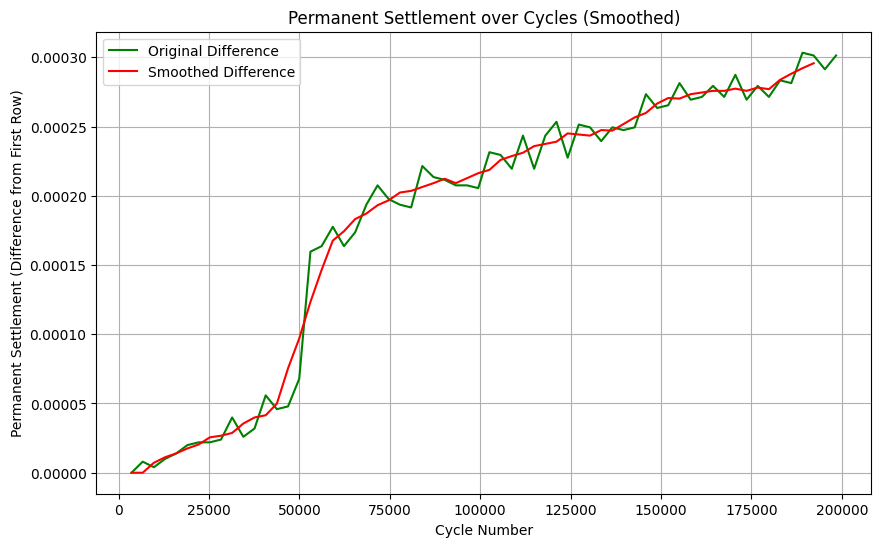

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

def add_difference_from_first_row(df, column_name):
    """
    Calculates the difference between each row value in the specified column and the first row's value,
    and adds a new column to the DataFrame with these differences.
    """
    first_value = df[column_name].iloc[0]
    df['Difference'] = df[column_name] - first_value
    return df

def add_smoothed_difference_column(df, window_size=5):
    """
    Calculates the rolling mean of the 'Difference' column and adds it as a new column.
    """
    df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
    return df

def plot_difference_with_smoothing(df):
    """
    Plots both the original 'Difference' and 'Smoothed_Difference' columns against Cycle_Number.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Cycle_Number'], df['Difference'], marker='', label='Original Difference', color='green')
    plt.plot(df['Cycle_Number'], df['Smoothed_Difference'], marker='', label='Smoothed Difference', color='red')
    plt.xlabel("Cycle Number")
    plt.ylabel("Permanent Settlement (Difference from First Row)")
    plt.title("Permanent Settlement over Cycles (Smoothed)")
    plt.legend()
    plt.grid()
    plt.show()

final_df_160_2_r = final_df[(final_df['velocity'] == 400) & (final_df['experiment_number'] == 6) & (final_df['position'] == 'Right')]

# Applying the difference calculation to the final_df_160_2_r dataset
final_df_160_2_r = add_difference_from_first_row(final_df_160_2_r, 'smoothed_displacement')

# Adding smoothed difference column
final_df_160_2_r = add_smoothed_difference_column(final_df_160_2_r, window_size=5)

# Plotting the original and smoothed difference colums
final_df_160_2_r['Smoothed_Difference'].iloc[0] = 0
final_df_160_2_r['Smoothed_Difference'].iloc[1] = 0
plot_difference_with_smoothing(final_df_160_2_r)


In [59]:
# final_df_160_2_r['Smoothed_Difference'].iloc[0] = 0
final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference,Smoothed_Difference
3574,17/06/2005 09:55:11,300.235,0,3583,1,15,1,1,400.0,10.29145,...,0.007942,0.007912,0.007922,0.007952,NaN,6,Right,0.007972,0.000000,0.000000
3575,17/06/2005 10:00:11,600.781,0,6680,1,15,1,1,400.0,10.29145,...,0.007982,0.007952,0.007892,0.007922,NaN,6,Right,0.007980,0.000008,0.000000
3576,17/06/2005 10:05:12,901.031,0,9768,1,15,1,1,400.0,10.29145,...,0.007942,0.007942,0.007952,0.007922,NaN,6,Right,0.007976,0.000004,0.000007
3577,17/06/2005 10:10:12,1201.438,0,12862,1,15,1,1,400.0,10.29145,...,0.007942,0.007892,0.007942,0.008012,NaN,6,Right,0.007982,0.000010,0.000011
3578,17/06/2005 10:15:13,1501.875,0,15951,1,15,1,1,400.0,10.29145,...,0.007902,0.007952,0.007982,0.007972,NaN,6,Right,0.007986,0.000014,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,17/06/2005 14:50:37,18026.422,0,186014,1,15,1,1,400.0,10.29145,...,0.008211,0.008271,0.008241,0.008201,NaN,6,Right,0.008253,0.000281,0.000288
3634,17/06/2005 14:55:38,18327.266,0,189109,1,15,1,1,400.0,10.29145,...,0.008211,0.008251,0.008261,0.008241,NaN,6,Right,0.008275,0.000303,0.000292
3635,17/06/2005 15:00:39,18627.875,0,192201,1,15,1,1,400.0,10.29145,...,0.008201,0.008251,0.008271,0.008231,NaN,6,Right,0.008273,0.000301,0.000296
3636,17/06/2005 15:05:39,18928.281,0,195295,1,15,1,1,400.0,10.29145,...,0.008251,0.008241,0.008181,0.008241,NaN,6,Right,0.008263,0.000291,NaN


In [60]:
# lezem l khat l a7mar yo2ta3 bl zero

Displacement (Original): 0.00027935999999999976
Displacement (Smoothed): 0.00021151799999999995


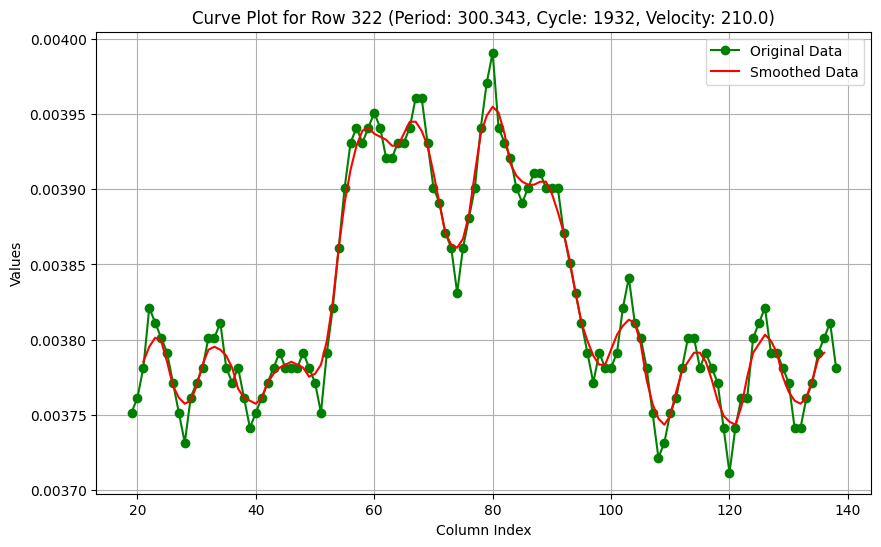

(0.00021151799999999995,
 19          NaN
 20          NaN
 21     0.003785
 22     0.003795
 23     0.003801
          ...   
 134    0.003773
 135    0.003787
 136    0.003791
 137         NaN
 138         NaN
 Name: 322, Length: 120, dtype: float64)

In [61]:
plot_row_curve_with_smoothing(final_df, 322, window_size=5)

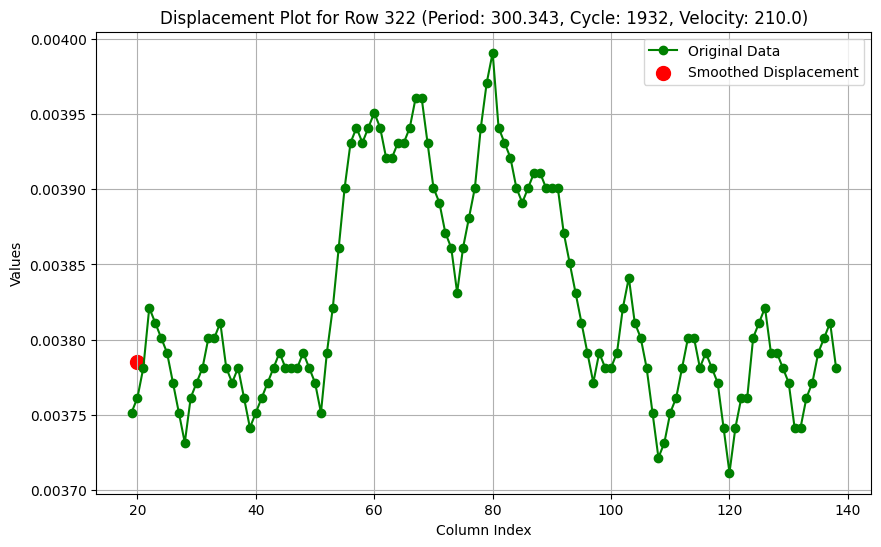

In [62]:
plot_row_displacement_with_smoothed_point(final_df, row_index=322)


# New Start

In [1]:
import pandas as pd
import numpy as np

final_df = pd.read_csv('../data/dataset/combined_valeurs.csv')


def calculate_first_smoothed_displacement(df, window_size=5):
    # Initialize a new column for smoothed displacement
    df['smoothed_displacement'] = np.nan
    
    for index in df.index:
        # Select the values from column 19 to column 138 (inclusive) in the current row
        data_to_smooth = pd.to_numeric(df.iloc[index, 19:139], errors='coerce')
        
        # Apply rolling mean for smoothing
        smoothed_data = data_to_smooth.rolling(window=window_size, center=True).mean()
        
        # Find the first non-NaN value in the smoothed data
        first_non_nan_value = smoothed_data[smoothed_data.notna()].iloc[0] if smoothed_data.notna().any() else np.nan
        
        # Store this value in the new column
        df.at[index, 'smoothed_displacement'] = first_non_nan_value
    
    return df

# Example usage:
# Calculate and add the smoothed displacement to the DataFrame
final_df = calculate_first_smoothed_displacement(final_df)


def add_segmented_differences(df):
    """
    Calculates the difference between each row's 'smoothed_displacement' and the 
    first value within each segment where 'velocity' and 'position' are consistent.
    """
    # Initialize the 'Difference' column
    df['Difference'] = 0.0
    
    # Variables to track the starting value for each segment
    reference_value = None
    current_velocity = None
    current_position = None

    for i in range(len(df)):
        row = df.iloc[i]
        
        # Check if the velocity or position has changed
        if row['velocity'] != current_velocity or row['position'] != current_position:
            # Reset the reference value for a new segment
            reference_value = row['smoothed_displacement']
            current_velocity = row['velocity']
            current_position = row['position']
        
        # Calculate the difference from the reference value
        df.at[i, 'Difference'] = row['smoothed_displacement'] - reference_value
    
    return df

# Applying the segmented difference calculation to the DataFrame
final_df = add_segmented_differences(final_df)



In [2]:
def calculate_first_smoothed_displacement(df, window_size=5):
    # Initialize a new column for smoothed displacement
    df['smoothed_displacement'] = np.nan
    
    for index in df.index:
        # Select the values from column 19 to column 138 (inclusive) in the current row
        data_to_smooth = pd.to_numeric(df.iloc[index, 19:139], errors='coerce')
        
        # Apply rolling mean for smoothing
        smoothed_data = data_to_smooth.rolling(window=window_size, center=True).mean()
        
        # Find the first non-NaN value in the smoothed data
        first_non_nan_value = smoothed_data[smoothed_data.notna()].iloc[0] if smoothed_data.notna().any() else np.nan
        
        # Store this value in the new column
        df.at[index, 'smoothed_displacement'] = first_non_nan_value
    
    return df

def smooth_difference(df, window_size=5):
    # Apply a rolling mean to smooth the 'Difference' column
    df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
    
    # Set the first few values to match the original 'Difference' values
    if len(df) > window_size:
        df['Smoothed_Difference'].iloc[:window_size] = df['Difference'].iloc[:window_size]
        # Set the last few values to match the original 'Difference' values
        df['Smoothed_Difference'].iloc[-window_size:] = df['Difference'].iloc[-window_size:]    
    return df

# Example usage:
# Calculate and add the smoothed displacement to the DataFrame
final_df = calculate_first_smoothed_displacement(final_df)
final_df['position'] = final_df['position'].replace({'Right': 0, 'Left': 1})
final_df.drop(columns=['Date'], inplace=True)

# Average displacement for each experiment
unique_values_col4 = final_df['experiment_number'].unique()

# Creating separate DataFrames for each experiment and storing them in a dictionary
experiment_tables = {exp_num: final_df[final_df['experiment_number'] == exp_num] for exp_num in unique_values_col4}

table_2 = experiment_tables[2]
table_3 = experiment_tables[3]
table_6 = experiment_tables[6]
table_7 = experiment_tables[7]

table_2['id'] = range(len(table_2))
table_3['id'] = range(len(table_3))
table_6['id'] = range(len(table_6))
table_7['id'] = range(len(table_7))

combined_df = pd.concat([table_2, table_3, table_6, table_7])

final_df = combined_df.groupby(['id', 'velocity']).mean().reset_index()





C:\Users\alira\AppData\Local\Temp\ipykernel_37368\2445661390.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['position'] = final_df['position'].replace({'Right': 0, 'Left': 1})
C:\Users\alira\AppData\Local\Temp\ipykernel_37368\2445661390.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2['id'] = range(len(table_2))
C:\Users\alira\AppData\Local\Temp\ipykernel_37368\2445661390.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [3]:
final_df

,id,velocity,Period,2,Cycle_Number,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference
0,0,160.0,300.65650,0.0,1772.25,1.0,15.0,1.0,1.0,4.116579,...,0.002819,0.002831,0.002831,0.002804,0.002833,NaN,4.5,0.0,0.002822,0.000000
1,1,160.0,601.11325,0.0,3009.75,1.0,15.0,1.0,1.0,4.116579,...,0.002816,0.002873,0.002819,0.002853,0.002858,NaN,4.5,0.0,0.002844,0.000022
2,2,160.0,901.65225,0.0,4246.75,1.0,15.0,1.0,1.0,4.116579,...,0.002846,0.002856,0.002861,0.002861,0.002858,NaN,4.5,0.0,0.002855,0.000033
3,3,160.0,1202.14075,0.0,5483.50,1.0,15.0,1.0,1.0,4.116579,...,0.002866,0.002858,0.002853,0.002861,0.002863,NaN,4.5,0.0,0.002865,0.000043
4,4,160.0,1502.75775,0.0,6721.00,1.0,15.0,1.0,1.0,4.116579,...,0.002878,0.002876,0.002858,0.002888,0.002853,NaN,4.5,0.0,0.002875,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1319,400.0,15774.14050,0.0,163046.50,1.0,14.0,1.0,1.0,10.291450,...,0.003133,0.003103,0.003083,0.003098,0.003128,NaN,6.5,1.0,0.003113,0.001618
1450,1320,400.0,16074.75800,0.0,166138.50,1.0,14.0,1.0,1.0,10.291450,...,0.003098,0.003152,0.003143,0.003113,0.003113,NaN,6.5,1.0,0.003144,0.001648
1451,1321,400.0,16375.59350,0.0,169235.00,1.0,14.0,1.0,1.0,10.291450,...,0.003118,0.003088,0.003083,0.003113,0.003123,NaN,6.5,1.0,0.003124,0.001629
1452,1322,400.0,16676.23400,0.0,172329.00,1.0,14.0,1.0,1.0,10.291450,...,0.003143,0.003108,0.003103,0.003098,0.003123,NaN,6.5,1.0,0.003136,0.001640


In [4]:
import pandas as pd

# Function to create separate DataFrames based on unique combinations of velocity and position
def create_tables_by_velocity_position(df):
    tables = {}
    unique_velocities = df['velocity'].unique()
    unique_positions = df['position'].unique()

    print(unique_velocities)
    print(unique_positions)
    
    for velocity in unique_velocities:
        for position in unique_positions:
            # Filter the DataFrame based on the current combination of velocity and position
            filtered_df = df[(df['velocity'] == int(velocity)) & (df['position'] == int(position))]
            
            # Create a dynamic name for the DataFrame based on velocity and position
            table_name = f"df_{int(velocity)}_{int(position)}"
            tables[table_name] = filtered_df
    
    return tables

# Example usage
tables_dict = create_tables_by_velocity_position(final_df)

[160. 210. 270. 320. 360. 380. 400.]
[0.  1.  0.5]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming smooth_difference is already defined
def smooth_difference(df, window_size=5):
    df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
    # Set the first and last values as per previous conditions
    if len(df) > 1:
        first_value = df['Difference'].iloc[0]
        connect_value = df['Smoothed_Difference'].iloc[window_size]
        linear_interp_start = np.linspace(first_value, connect_value, num=window_size)
        df['Smoothed_Difference'].iloc[:window_size] = linear_interp_start

        # Last section: Linearly connect from the smoothed value before window_size to the last value
        last_value = df['Difference'].iloc[-1]
        connect_value_end = df['Smoothed_Difference'].iloc[-(window_size + 1)]
        linear_interp_end = np.linspace(connect_value_end, last_value, num=window_size)
        df['Smoothed_Difference'].iloc[-window_size:] = linear_interp_end
    return df

# Apply smoothing to each table in tables_dict and store results
for table_name, table_df in tables_dict.items():
    # Apply the smoothing function
    tables_dict[table_name] = smooth_difference(table_df, 9)

# Combine all tables back into a single DataFrame based on 'id'
combined_df = pd.concat(tables_dict.values(), ignore_index=True)

# Sort the combined DataFrame by 'id' to maintain order if needed
combined_df = combined_df.sort_values(by='id').reset_index(drop=True)

combined_df


C:\Users\alira\AppData\Local\Temp\ipykernel_37368\3820882088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_37368\3820882088.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, lik

,id,velocity,Period,2,Cycle_Number,4,5,6,7,9,...,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference,Smoothed_Difference
0,0,160.0,300.65650,0.0,1772.25,1.0,15.0,1.0,1.0,4.116579,...,0.002831,0.002831,0.002804,0.002833,NaN,4.5,0.0,0.002822,0.000000,0.000000
1,1,160.0,601.11325,0.0,3009.75,1.0,15.0,1.0,1.0,4.116579,...,0.002873,0.002819,0.002853,0.002858,NaN,4.5,0.0,0.002844,0.000022,0.000008
2,2,160.0,901.65225,0.0,4246.75,1.0,15.0,1.0,1.0,4.116579,...,0.002856,0.002861,0.002861,0.002858,NaN,4.5,0.0,0.002855,0.000033,0.000017
3,3,160.0,1202.14075,0.0,5483.50,1.0,15.0,1.0,1.0,4.116579,...,0.002858,0.002853,0.002861,0.002863,NaN,4.5,0.0,0.002865,0.000043,0.000025
4,4,160.0,1502.75775,0.0,6721.00,1.0,15.0,1.0,1.0,4.116579,...,0.002876,0.002858,0.002888,0.002853,NaN,4.5,0.0,0.002875,0.000053,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1319,400.0,15774.14050,0.0,163046.50,1.0,14.0,1.0,1.0,10.291450,...,0.003103,0.003083,0.003098,0.003128,NaN,6.5,1.0,0.003113,0.001618,0.001622
1449,1320,400.0,16074.75800,0.0,166138.50,1.0,14.0,1.0,1.0,10.291450,...,0.003152,0.003143,0.003113,0.003113,NaN,6.5,1.0,0.003144,0.001648,0.001624
1450,1321,400.0,16375.59350,0.0,169235.00,1.0,14.0,1.0,1.0,10.291450,...,0.003088,0.003083,0.003113,0.003123,NaN,6.5,1.0,0.003124,0.001629,0.001627
1451,1322,400.0,16676.23400,0.0,172329.00,1.0,14.0,1.0,1.0,10.291450,...,0.003108,0.003103,0.003098,0.003123,NaN,6.5,1.0,0.003136,0.001640,0.001629


In [6]:
import pandas as pd

averaged_df = (
    combined_df.groupby(['velocity', 'Cycle_Number'], as_index=False)
    .mean()  # Compute the mean for all numeric columns
)

# Drop `position` as it no longer makes sense after averaging
averaged_df = averaged_df.drop(columns=['position'], errors='ignore')

averaged_df

C:\Users\alira\AppData\Local\Temp\ipykernel_37368\554720152.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .mean()  # Compute the mean for all numeric columns
C:\Users\alira\AppData\Local\Temp\ipykernel_37368\554720152.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .mean()  # Compute the mean for all numeric columns


,velocity,Cycle_Number,id,Period,2,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,smoothed_displacement,Difference,Smoothed_Difference
0,160.0,1772.25,80.5,300.65650,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003019,0.003032,0.003014,0.003013,0.003028,NaN,4.5,0.003017,0.000000,0.000000
1,160.0,3009.75,81.5,601.11325,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003019,0.003049,0.003029,0.003040,0.003046,NaN,4.5,0.003038,0.000021,0.000008
2,160.0,4246.75,82.5,901.65225,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003042,0.003052,0.003044,0.003057,0.003057,NaN,4.5,0.003048,0.000031,0.000016
3,160.0,5483.50,83.5,1202.14075,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003056,0.003055,0.003052,0.003057,0.003050,NaN,4.5,0.003059,0.000042,0.000024
4,160.0,6721.00,84.5,1502.75775,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003066,0.003071,0.003056,0.003074,0.003060,NaN,4.5,0.003065,0.000047,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,400.0,163046.50,1287.0,15774.14050,0.0,1.0,14.5,1.0,1.0,10.291450,...,0.003771,0.003764,0.003764,0.003771,0.003781,NaN,6.5,0.003790,0.000195,0.000196
787,400.0,166138.50,1288.0,16074.75800,0.0,1.0,14.5,1.0,1.0,10.291450,...,0.003749,0.003781,0.003791,0.003786,0.003786,NaN,6.5,0.003811,0.000216,0.000199
788,400.0,169235.00,1289.0,16375.59350,0.0,1.0,14.5,1.0,1.0,10.291450,...,0.003766,0.003744,0.003769,0.003796,0.003789,NaN,6.5,0.003802,0.000207,0.000202
789,400.0,172329.00,1290.0,16676.23400,0.0,1.0,14.5,1.0,1.0,10.291450,...,0.003789,0.003774,0.003766,0.003761,0.003794,NaN,6.5,0.003807,0.000212,0.000204


In [7]:
# Drop all rows where velocity is 400
averaged_df = averaged_df[averaged_df['velocity'] != 400]

# Optionally reset the index if needed
averaged_df.reset_index(drop=True, inplace=True)

averaged_df


,velocity,Cycle_Number,id,Period,2,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,smoothed_displacement,Difference,Smoothed_Difference
0,160.0,1772.25,80.5,300.65650,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003019,0.003032,0.003014,0.003013,0.003028,NaN,4.5,0.003017,0.000000,0.000000
1,160.0,3009.75,81.5,601.11325,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003019,0.003049,0.003029,0.003040,0.003046,NaN,4.5,0.003038,0.000021,0.000008
2,160.0,4246.75,82.5,901.65225,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003042,0.003052,0.003044,0.003057,0.003057,NaN,4.5,0.003048,0.000031,0.000016
3,160.0,5483.50,83.5,1202.14075,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003056,0.003055,0.003052,0.003057,0.003050,NaN,4.5,0.003059,0.000042,0.000024
4,160.0,6721.00,84.5,1502.75775,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003066,0.003071,0.003056,0.003074,0.003060,NaN,4.5,0.003065,0.000047,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,380.0,188809.50,1157.0,19230.41400,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003555,0.003592,0.003562,0.003597,0.003587,NaN,6.5,0.003595,0.000194,0.000190
594,380.0,191746.00,1158.0,19530.91400,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003567,0.003580,0.003580,0.003590,0.003594,NaN,6.5,0.003592,0.000191,0.000193
595,380.0,194684.50,1159.0,19831.52350,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003577,0.003572,0.003592,0.003580,0.003607,NaN,6.5,0.003592,0.000191,0.000196
596,380.0,197626.00,1160.0,20132.34350,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003587,0.003575,0.003597,0.003590,0.003604,NaN,6.5,0.003602,0.000201,0.000199


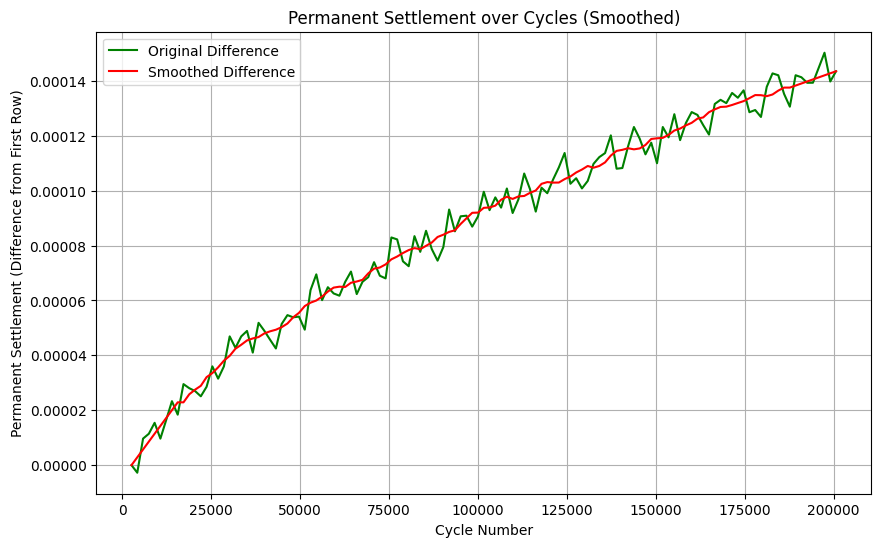

In [8]:
# Filter the DataFrame based on position and velocity, and plot
df = averaged_df[averaged_df['velocity'] == 210]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['Difference'], label='Original Difference', color='green')
plt.plot(df['Cycle_Number'], df['Smoothed_Difference'], label='Smoothed Difference', color='red')
plt.xlabel("Cycle Number")
plt.ylabel("Permanent Settlement (Difference from First Row)")
plt.title("Permanent Settlement over Cycles (Smoothed)")
plt.legend()
plt.grid()
plt.show()

In [9]:
import matplotlib.pyplot as plt

def generate_and_plot_settlement(model, ground_truth_df, start_cycle, end_cycle, step_size, velocity):
    # Generate cycle numbers for the prediction
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    # Predict settlement
    predicted_settlement = model.predict(new_data)

    # Filter ground truth data for the specified cycle range and velocity
    ground_truth_filtered = ground_truth_df[
        (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
        (ground_truth_df['velocity'] == velocity)
    ]
    
    # Plot predicted settlement
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_settlement, label='Predicted settlement', color='blue', marker='')
    
    # Plot real settlement (ground truth)
    plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['Difference'], 
             label='Real settlement', color='green', marker='')
    
    # Plot settings
    plt.xlabel('Cycle Number')
    plt.ylabel('settlement')
    plt.title(f'settlement Prediction vs Real for Velocity {velocity} km/h')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def generate_and_plot_multiple_settlements(model, ground_truth_df, step_size, *velocity_ranges):
    """
    Generate and plot settlements for multiple velocity and cycle number ranges.

    Parameters:
        model: Trained model for prediction.
        ground_truth_df: DataFrame containing the ground truth values.
        step_size: Step size for generating cycle numbers.
        *velocity_ranges: List of lists, each containing [velocity, start_cycle, end_cycle].

    Example:
        generate_and_plot_multiple_settlements(model, ground_truth_df, 1000, [160, 1, 12000], [320, 12000, 40000])
    """
    plt.figure(figsize=(12, 8))

    for velocity_range in velocity_ranges:
        velocity, start_cycle, end_cycle = velocity_range

        # Generate cycle numbers for the prediction
        cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
        new_data = pd.DataFrame({
            'velocity': [velocity] * len(cycle_numbers),
            'Cycle_Number': cycle_numbers
        })

        # Predict settlement
        predicted_settlement = model.predict(new_data)

        # Filter ground truth data for the specified cycle range and velocity
        ground_truth_filtered = ground_truth_df[
            (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
            (ground_truth_df['velocity'] == velocity)
        ]
        
        # Plot predicted settlement
        plt.plot(cycle_numbers, predicted_settlement, label=f'Predicted (Velocity {velocity} km/h)', marker='')
        
        # Plot real settlement (ground truth)
        plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['Difference'], 
                 label=f'Real (Velocity {velocity} km/h)', marker='', color='green')
    
    # Plot settings
    plt.xlabel('Cycle Number')
    plt.ylabel('settlement')
    plt.title('Settlement Prediction vs Real for Multiple Velocities')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 4, 6, 8, 16],
    'max_features': ['sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


NameError: name 'averaged_df' is not defined

In [12]:
from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')

R2 Score on Validation Set: 0.9993
R2 Score on Test Set: 0.9964


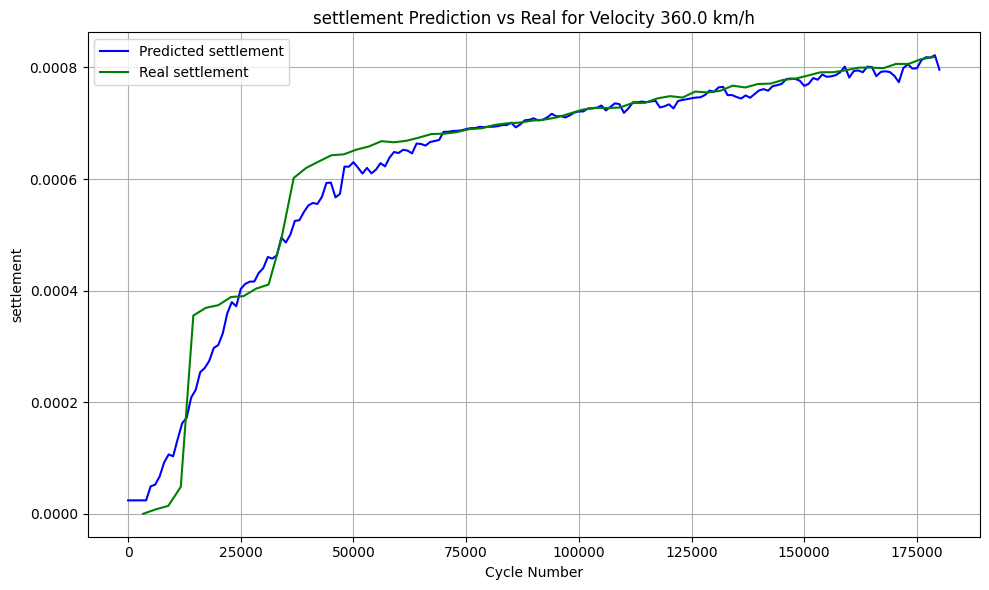

In [13]:
# Example usage of the function
generate_and_plot_settlement(best_model, averaged_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)


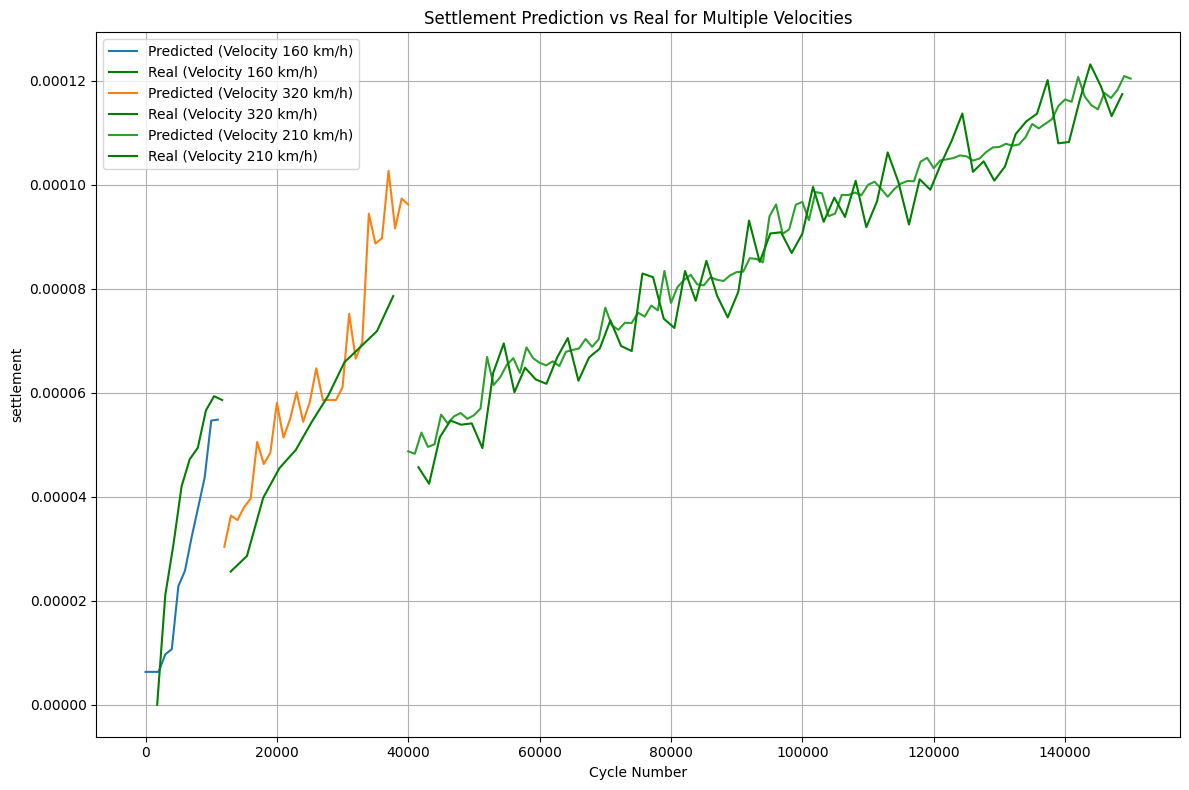

In [34]:
velocity_ranges = [[160, 1, 12000], [320, 12000, 40000], [210, 40000, 150000]]

generate_and_plot_multiple_settlements(
    best_model, 
    averaged_df, 
    1000, 
    *velocity_ranges
)


# Light GBM

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import lightgbm as lgb
import numpy as np

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the LightGBM model and hyperparameters to tune
model = lgb.LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [10],  # -1 means no limit for max_depth
    'learning_rate': [0.2],
    'num_leaves': [31],
    'subsample': [0.4, 0.6],
    'colsample_bytree': [1.0, 1.2]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model_lgb = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_lgb, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_lgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_lgb.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 1189, in fit
    super().fit(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\sit

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 2
[LightGBM] [Info] Start training from score 0.000260
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [57]:
print(grid_search.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.4}


R2 Score on Validation Set: 0.9996
R2 Score on Test Set: 0.9978


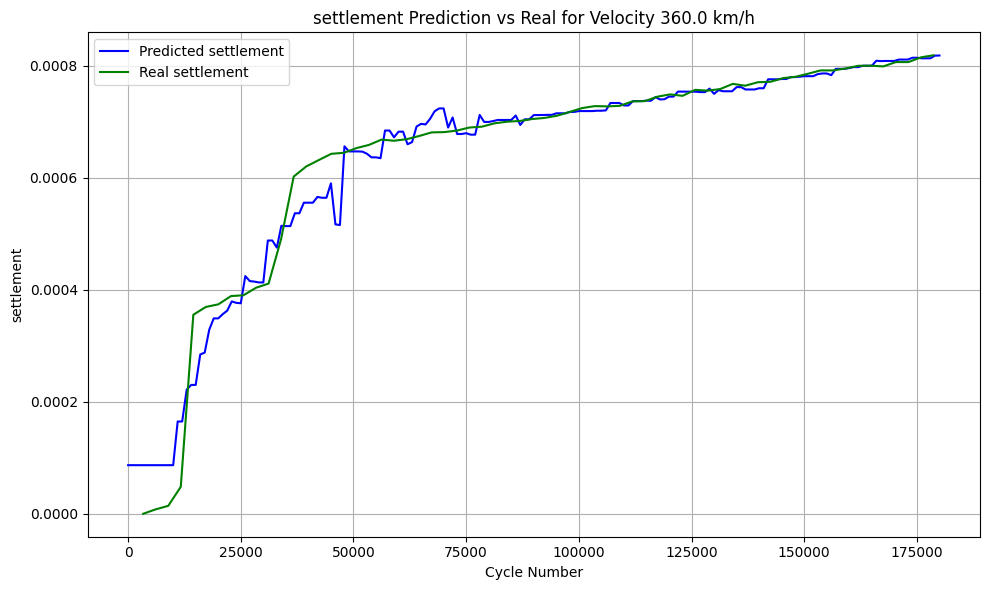

In [58]:
from sklearn.metrics import r2_score

y_pred_val = best_model_lgb.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model_lgb.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')
generate_and_plot_settlement(best_model_lgb, averaged_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)

Validation Score (cross-validated): 0.4724
R2 Score on Validation Set: 0.8090
R2 Score on Test Set: 0.7714


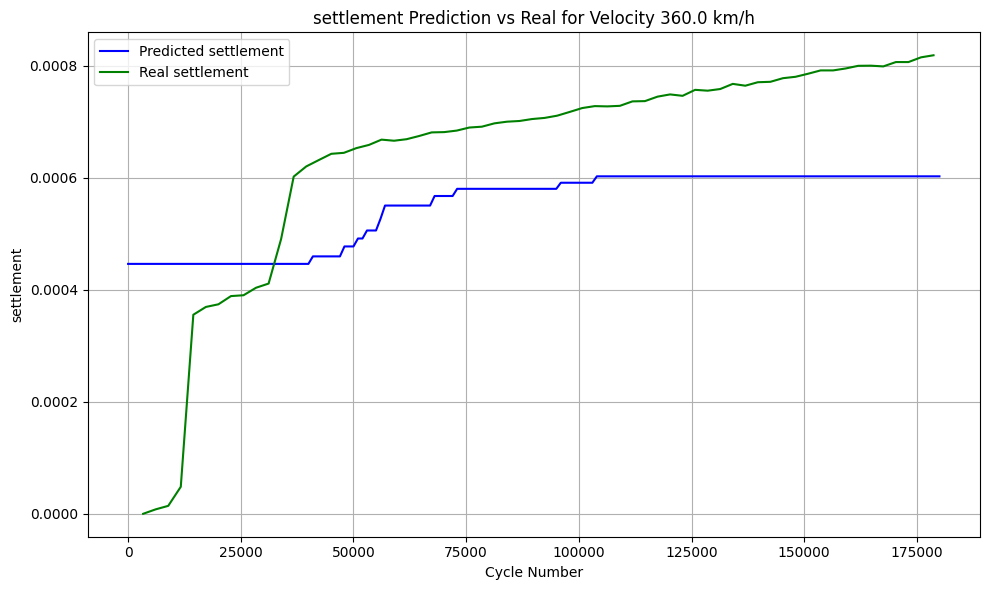

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RepeatedKFold

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits


# Define the XGBoost model and hyperparameters to tune
best_model_xgb = xgb.XGBRegressor(random_state=42, n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_xgb, X_val, y_val, cv=cv, scoring='r2')
mean_val_score = np.mean(val_scores)

print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_xgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_xgb.predict(X_test)

from sklearn.metrics import r2_score

y_pred_val = best_model_xgb.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model_xgb.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')

generate_and_plot_settlement(best_model_xgb, averaged_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)



# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('svr', SVR())  # SVR model (kernel can be tuned in GridSearchCV)
])

# Define the parameter grid for SVR
param_grid = {
    'svr__kernel': ['rbf', 'linear', 'poly'],  # Explore different kernels
    'svr__C': [0.1, 1.0, 10, 100],            # Regularization parameter
    'svr__epsilon': [0.01, 0.1, 0.5, 1.0],    # Tolerance margin
    'svr__gamma': ['scale', 'auto']           # Kernel coefficient (for rbf/poly kernels)
}

# Set up GridSearchCV with R-squared as the scoring metric
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',  # Use R-squared as the evaluation metric
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # Use all available CPU cores
    verbose=2      # Display progress
)

# Run the grid search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared Score: {r2:.4f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Test R-squared Score: -1.0330


# Linear Regression

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge Parameters: {'alpha': 100}
Ridge Test R-squared Score: 0.1367
Best Lasso Parameters: {'alpha': 0.01}
Lasso Test R-squared Score: 0.1132


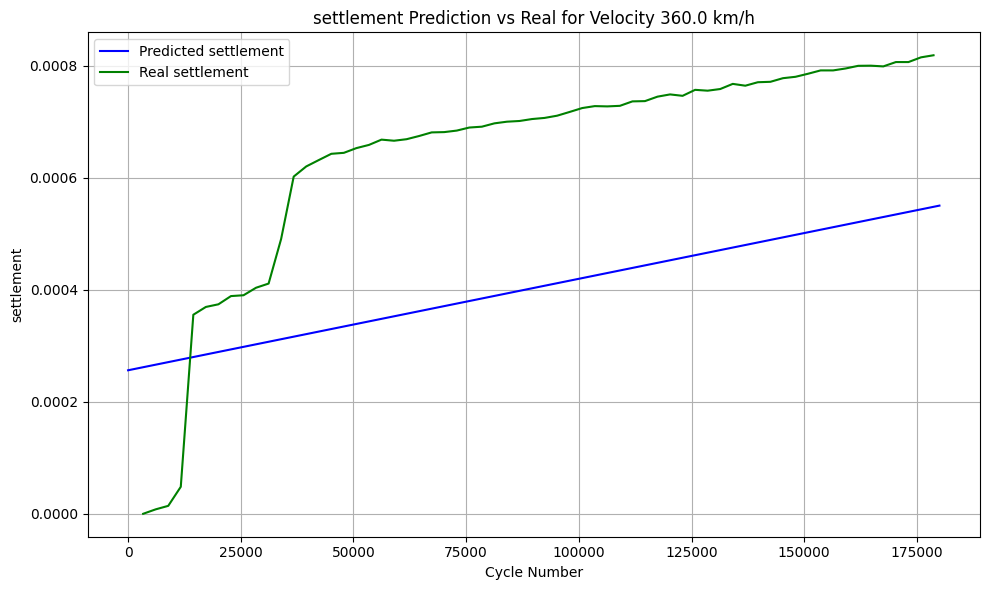

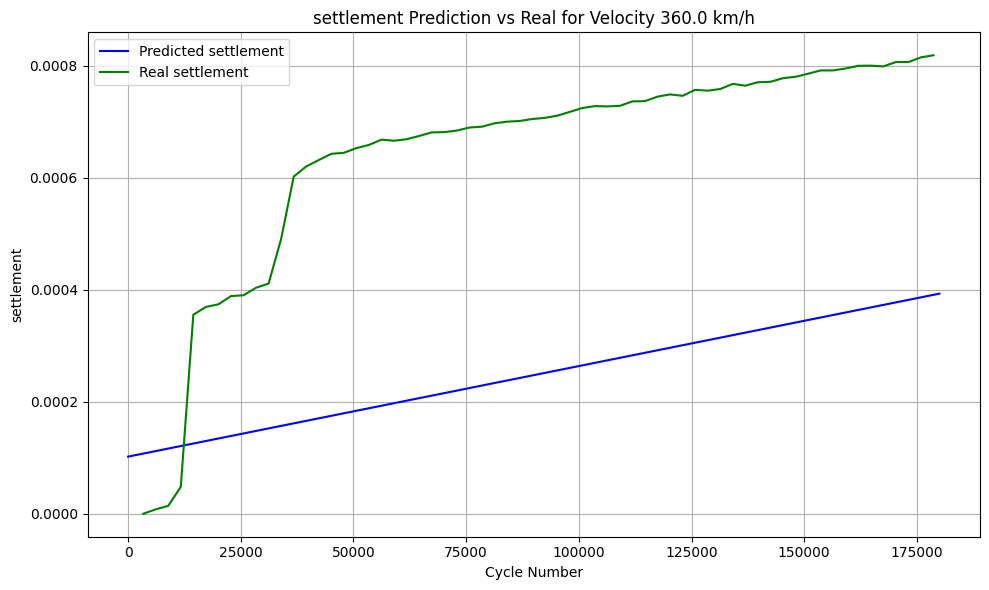

In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define models for Ridge and Lasso
ridge_model = Ridge()
lasso_model = Lasso()

# Define hyperparameter grids
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Ridge Regression Grid Search
ridge_grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='r2',  # Use R² as the scoring metric
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)
ridge_grid_search.fit(X_train_val, y_train_val)
best_ridge_model = ridge_grid_search.best_estimator_

# Lasso Regression Grid Search
lasso_grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)
lasso_grid_search.fit(X_train_val, y_train_val)
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluate the best Ridge model on the test set
y_test_pred_ridge = best_ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_test_pred_ridge)
print(f"Best Ridge Parameters: {ridge_grid_search.best_params_}")
print(f"Ridge Test R-squared Score: {ridge_r2:.4f}")

# Evaluate the best Lasso model on the test set
y_test_pred_lasso = best_lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_test_pred_lasso)
print(f"Best Lasso Parameters: {lasso_grid_search.best_params_}")
print(f"Lasso Test R-squared Score: {lasso_r2:.4f}")

generate_and_plot_settlement(best_ridge_model, averaged_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)

generate_and_plot_settlement(best_lasso_model, averaged_df,
                             start_cycle=0, end_cycle=180000, step_size=1000,
                             velocity=360.0)


# MLP

In [25]:
averaged_df

,velocity,Cycle_Number,id,Period,2,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,smoothed_displacement,Difference,Smoothed_Difference
0,160.0,1772.25,80.5,300.65650,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003019,0.003032,0.003014,0.003013,0.003028,NaN,4.5,0.003017,0.000000,0.000000
1,160.0,3009.75,81.5,601.11325,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003019,0.003049,0.003029,0.003040,0.003046,NaN,4.5,0.003038,0.000021,0.000008
2,160.0,4246.75,82.5,901.65225,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003042,0.003052,0.003044,0.003057,0.003057,NaN,4.5,0.003048,0.000031,0.000016
3,160.0,5483.50,83.5,1202.14075,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003056,0.003055,0.003052,0.003057,0.003050,NaN,4.5,0.003059,0.000042,0.000024
4,160.0,6721.00,84.5,1502.75775,0.0,1.0,14.5,1.0,1.0,4.116579,...,0.003066,0.003071,0.003056,0.003074,0.003060,NaN,4.5,0.003065,0.000047,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,380.0,188809.50,1157.0,19230.41400,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003555,0.003592,0.003562,0.003597,0.003587,NaN,6.5,0.003595,0.000194,0.000190
594,380.0,191746.00,1158.0,19530.91400,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003567,0.003580,0.003580,0.003590,0.003594,NaN,6.5,0.003592,0.000191,0.000193
595,380.0,194684.50,1159.0,19831.52350,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003577,0.003572,0.003592,0.003580,0.003607,NaN,6.5,0.003592,0.000191,0.000196
596,380.0,197626.00,1160.0,20132.34350,0.0,1.0,14.5,1.0,1.0,9.776876,...,0.003587,0.003575,0.003597,0.003590,0.003604,NaN,6.5,0.003602,0.000201,0.000199


In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('mlp', MLPRegressor(max_iter=2000, random_state=42))  # MLP Regressor
])

# Define the hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128, 64), (256, 128, 64)],  # Varying layer architectures
    'mlp__activation': ['relu', 'tanh'],                           # Activation functions
    'mlp__alpha': [0.01, 0.1, 0.2],                              # L2 regularization (alpha)
    'mlp__solver': ['adam', 'lbfgs'],                              # Optimizers
    'mlp__learning_rate': ['constant', 'adaptive'],                # Learning rate schedule
}

# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=param_grid,
    scoring='r2',       # Use R² as the evaluation metric
    cv=5,               # 5-fold cross-validation
    verbose=2,          # Display progress
    n_jobs=-1           # Use all available cores
)

# Fit the Grid Search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and model
best_mlp_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_mlp_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared Score: {r2:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.2, 'mlp__hidden_layer_sizes': (256, 128, 64), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Test MAE: 0.0003
Test MSE: 0.0000
Test R-squared Score: -0.9320


# XG Boost

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],            # Number of trees
    'max_depth': [3, 5, 7],                    # Maximum depth of each tree
    'learning_rate': [0.01, 0.1],          # Step size shrinkage
    'subsample': [0.2, 0.6],               # Fraction of samples for training
    'colsample_bytree': [0.6, 1.0],        # Fraction of features for each tree
    'min_child_weight': [1],              # Minimum sum of instance weights in a child
    'reg_alpha': [0.1, 1.0],              # L1 regularization (lasso)
    'reg_lambda': [0.1, 1.0]              # L2 regularization (ridge)
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',            # Use R-squared as the evaluation metric
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Display progress
    n_jobs=-1                # Use all available CPU cores
)

# Fit the Grid Search on the training/validation set
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and model
best_xgb_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate on the test set
y_test_pred = best_xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R-squared Score: {r2:.4f}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.2}
Test MAE: 0.0002
Test MSE: 0.0000
Test R-squared Score: -0.0304


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# RandomForest + Polynomial Features

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Define features and target
X = averaged_df[['velocity', 'Cycle_Number']]
y = averaged_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the pipeline with Polynomial Features, Scaler, and RandomForestRegressor
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Add polynomial features
    ('scaler', StandardScaler()),  # Standardize features
    ('model', RandomForestRegressor(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [2, 3, 5],  # Degree of polynomial features
    'model__n_estimators': [20, 50, 150],
    'model__max_depth': [3, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 4, 6],
    'model__max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1215 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
774 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, *

Best Model Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150, 'poly__degree': 2}
Validation Score (cross-validated): 1.0000
Test Score: 1.0000


In [22]:
from sklearn.metrics import r2_score

# Evaluate the model on the test set
r2 = r2_score(y_test, y_test_pred)

# Print the R² score
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.9978


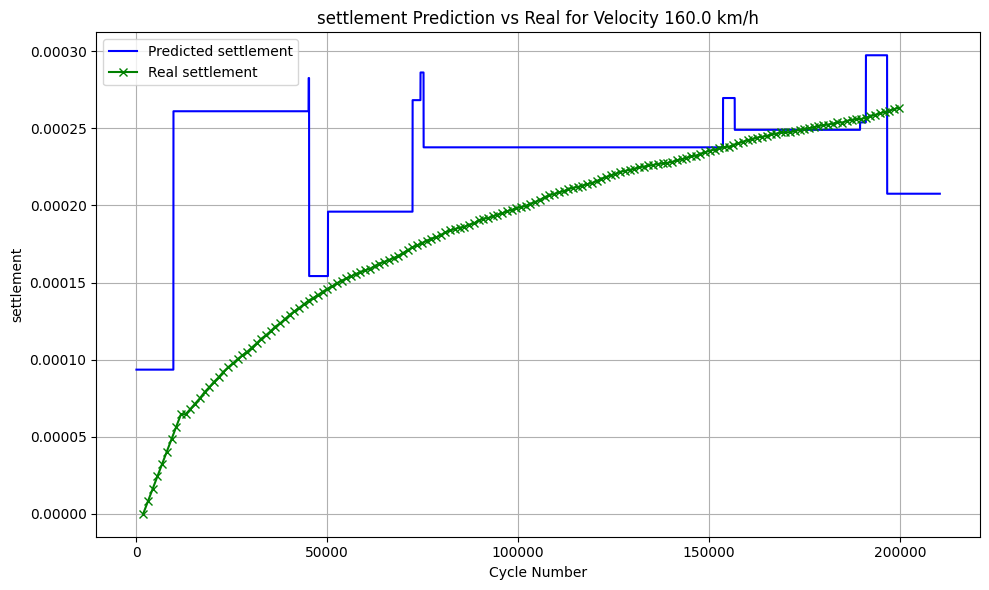

In [118]:
import matplotlib.pyplot as plt

def generate_and_plot_settlement(model, ground_truth_df, start_cycle, end_cycle, step_size, velocity):
    # Generate cycle numbers for the prediction
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    # Predict settlement
    predicted_settlement = model.predict(new_data)

    # Filter ground truth data for the specified cycle range and velocity
    ground_truth_filtered = ground_truth_df[
        (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
        (ground_truth_df['velocity'] == velocity)
    ]
    
    # Plot predicted settlement
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_settlement, label='Predicted settlement', color='blue', marker='')
    
    # Plot real settlement (ground truth)
    plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['Smoothed_Difference'], 
             label='Real settlement', color='green', marker='x')
    
    # Plot settings
    plt.xlabel('Cycle Number')
    plt.ylabel('settlement')
    plt.title(f'settlement Prediction vs Real for Velocity {velocity} km/h')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage of the function
generate_and_plot_settlement(best_model, averaged_df,
                             start_cycle=0, end_cycle=210473, step_size=1,
                             velocity=160.0)


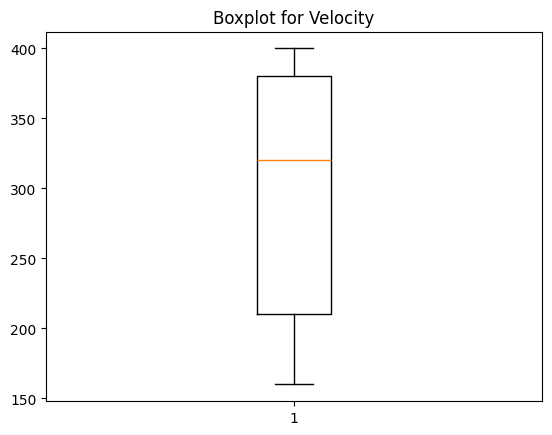

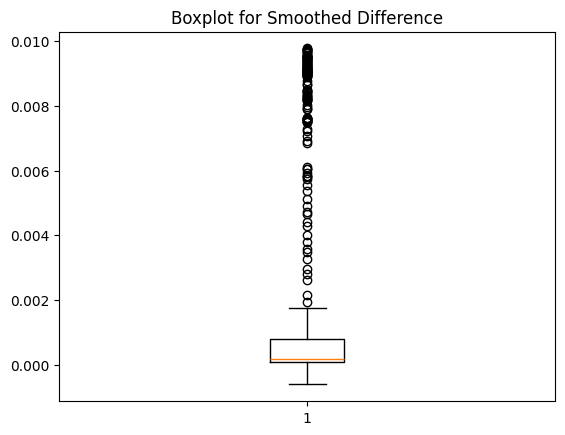

In [77]:
import matplotlib.pyplot as plt

# Check for outliers in velocity
plt.boxplot(X['velocity'])
plt.title("Boxplot for Velocity")
plt.show()

# Check for outliers in smoothed_displacement
plt.boxplot(y)
plt.title("Boxplot for Smoothed Difference")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Multivariable Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'SVM': SVR()
}

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
std_dev = np.std(y_test_pred)
r2 = r2_score(y_test, y_test_pred)


results = {
    'Algorithm': ['Random Forest (optimized)'],
    'R2': [r2],  
    'σ': [std_dev],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse]
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)  # R2 score
    std_dev = np.std(y_pred)
    
    # Store the results
    results['Algorithm'].append(name)
    results['R2'].append(r2)
    results['σ'].append(std_dev)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['MSE'].append(mse)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set display options to show numbers in standard decimal format
pd.options.display.float_format = '{:.4f}'.format

# Display the results DataFrame
results_df



,Algorithm,R2,σ,RMSE,MAE,MSE
0,Random Forest (optimized),0.5327,0.0016,0.0016,0.0006,0.0000
1,Multivariable Regression,0.2168,0.0010,0.0020,0.0013,0.0000
2,Decision Tree,-0.1013,0.0020,0.0024,0.0008,0.0000
3,Neural Network,-2596538.3989,3.6050,3.7018,2.2383,13.7035
4,SVM,-1.6481,0.0000,0.0037,0.0037,0.0000


combined_df

In [103]:
experiment_tables[3]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference
1190,18/02/2005 14:43:01,300.828,0,1972,1,15,1,1,160.0,4.116579,...,0.001906,0.001926,0.001936,0.001886,0.001926,NaN,3,Right,0.001910,0.000000
1191,18/02/2005 14:48:02,601.562,0,3211,1,15,1,1,160.0,4.116579,...,0.001946,0.001995,0.001946,0.001985,0.001975,NaN,3,Right,0.001965,0.000056
1192,18/02/2005 14:53:02,902.234,0,4449,1,15,1,1,160.0,4.116579,...,0.001985,0.001995,0.002015,0.001975,0.002005,NaN,3,Right,0.001987,0.000078
1193,18/02/2005 14:58:03,1202.812,0,5687,1,15,1,1,160.0,4.116579,...,0.001995,0.002015,0.001956,0.002025,0.001965,NaN,3,Right,0.001997,0.000088
1194,18/02/2005 15:03:03,1503.046,0,6921,1,15,1,1,160.0,4.116579,...,0.002025,0.001995,0.002005,0.002015,0.001965,NaN,3,Right,0.002009,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,24/02/2005 17:58:06,18028.797,0,186154,1,14,1,1,400.0,10.291450,...,0.016168,0.016197,0.016207,0.016187,0.016187,NaN,3,Left,0.016233,0.011742
2374,24/02/2005 18:03:07,18329.656,0,189249,1,14,1,1,400.0,10.291450,...,0.016197,0.016187,0.016197,0.016197,0.016197,NaN,3,Left,0.016227,0.011736
2375,24/02/2005 18:08:08,18630.062,0,192343,1,14,1,1,400.0,10.291450,...,0.016138,0.016207,0.016237,0.016217,0.016207,NaN,3,Left,0.016229,0.011738
2376,24/02/2005 18:13:08,18930.125,0,195427,1,14,1,1,400.0,10.291450,...,0.016177,0.016168,0.016138,0.016197,0.016227,NaN,3,Left,0.016252,0.011762


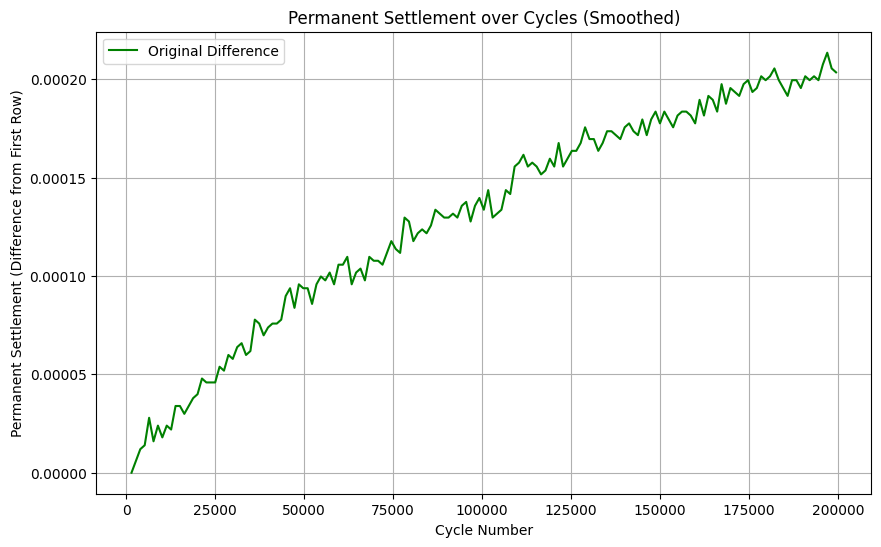

In [96]:
df = final_df[(final_df['velocity'] == 160) & (final_df['experiment_number'] == 2) & (final_df['position'] == 'Right')]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['Difference'], marker='', label='Original Difference', color='green')
plt.xlabel("Cycle Number")
plt.ylabel("Permanent Settlement (Difference from First Row)")
plt.title("Permanent Settlement over Cycles (Smoothed)")
plt.legend()
plt.grid()
plt.show()

# ML